In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Read CSV 
foal_nonMT_IS_meta = pd.read_csv("../../output/04_fragmentomics/library_prep_comparison_EquCabAll_nonMT_IS_meta.csv")

# Convert some columns into factors (categorical variables)
foal_nonMT_IS_meta = foal_nonMT_IS_meta.apply(
    lambda x: pd.factorize(x)[0] if x.name not in ['TLEN', 'Count', 'side', 'EndMotif_tmp', 'sample_id'] else x)

# Take absolute value of TLEN
foal_nonMT_IS_meta['TLEN'] = foal_nonMT_IS_meta['TLEN'].abs()

# Filter rows where TLEN is less than 300 and read is 'R1'
foal_nonMT_IS_meta = foal_nonMT_IS_meta[(foal_nonMT_IS_meta['TLEN'] < 300) & (foal_nonMT_IS_meta['side'].str.startswith('R1'))]

# Group by sample_id, TLEN, read and calculate sum Count
summary_df = foal_nonMT_IS_meta.groupby(['sample_id', 'TLEN'])['Count'].sum().reset_index()

# Group by read and calculate nCount
summary_df['nCount'] = summary_df['Count'].transform(lambda x: x / x.sum()*100)

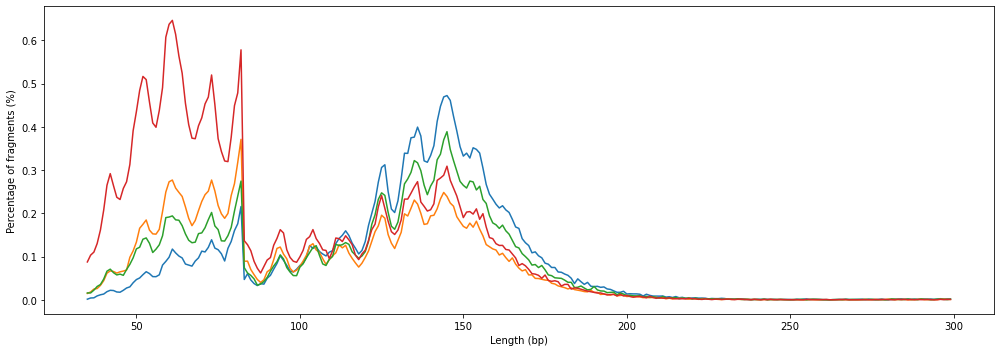

In [3]:
# Generate length profile of R1, <300bp
fig, ax = plt.subplots(figsize=(14, 5))
for sample_id, data in summary_df.groupby('sample_id'):
    ax.plot(data['TLEN'], data['nCount'], label=sample_id)
ax.set_xlabel('Length (bp)')
ax.set_ylabel('Percentage of fragments (%)')

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [8]:
### For Li-Ting
# see above for first version graph 
# Feel free to change colors, add legend, change format, style etc

# Consider removal of Mod retention protocol with BBSS. 
# Comparison Small retention --> Mod retention --> Mod retention with BBSS could be enough 